In [2]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [3]:
no_smile = glob.glob(r"C:\Users\Dhanush\Downloads\image smile\non_smile\*.jpg")
smile = glob.glob(r"C:\Users\Dhanush\Downloads\image smile\smile\*.jpg")
test = glob.glob(r"C:\Users\Dhanush\Downloads\image smile\test\*.jpg")

In [4]:
type(no_smile)


list

In [5]:
len(no_smile)

603

In [6]:
len(smile)

600

In [7]:
pic1 = Image.open(smile[1]).convert("L")


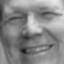

In [8]:
pic1

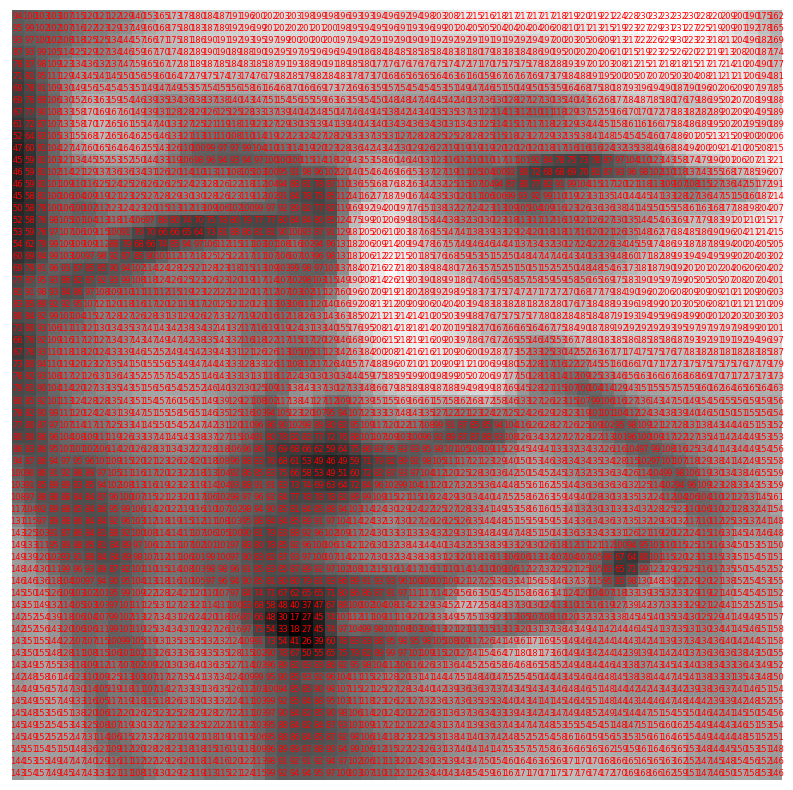

In [9]:
pixel_array = np.array(pic1)
plt.figure(figsize=(10, 10))
plt.imshow(pixel_array, cmap="gray", interpolation="nearest")

# Show pixel values overlaid on image
for i in range(64):
    for j in range(64):
        plt.text(j, i, pixel_array[i, j], ha="center", va="center", fontsize=6, color="red")

plt.axis("off")
plt.show()

In [10]:
data = []
labels = []
for img_name in smile:
    img = Image.open(img_name).convert("L")  # Convert to grayscale
    img_array = np.array(img).flatten()  # Flatten to 1D array
    data.append(img_array)
    labels.append(1)  # 1 = Smiling



In [11]:
for img_name in no_smile:
    img = Image.open(img_name).convert("L")  # Convert to grayscale
    img_array = np.array(img).flatten()  # Flatten to 1D array
    data.append(img_array)
    labels.append(0)  # 0 = Non-Smiling

In [12]:
len(data),len(labels)

(1203, 1203)

In [13]:
# 📌 Convert to NumPy arrays
X = np.array(data)  # Features (image pixels)
y = np.array(labels)  # Labels (0 or 1)

X,y = shuffle(X,y,random_state=42)

In [14]:
# 📌 Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
X_train.shape, X_test.shape


((962, 4096), (241, 4096))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
# 📌 Make Predictions
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)


In [19]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [20]:
model.predict_proba(X_test)

array([[0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 4.62825682e-074],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.08014550e-105],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 7.55822010e-043],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.08801856e-014, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 5.36193382e-159],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.0

In [21]:
# 📌 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8423
Confusion Matrix:
 [[103  20]
 [ 18 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       123
           1       0.83      0.85      0.84       118

    accuracy                           0.84       241
   macro avg       0.84      0.84      0.84       241
weighted avg       0.84      0.84      0.84       241



In [22]:
# Define parameter grid
param_grid = {
    'penalty' : ['l1','l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']
}

In [23]:
log_reg = LogisticRegression()
cv = StratifiedKFold()

In [24]:
# Perform grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

c:\Users\Dhanush\tf_env\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dhanush\tf_env\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dhanush\tf_env\lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Dhanush\tf_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1210, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['liblinear', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [25]:
grid_search.best_params_


{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}

In [26]:
grid_search.best_score_


np.float64(0.8908516839378239)

In [27]:
tuned_model = grid_search.best_estimator_ 


In [28]:
y_pred = tuned_model.predict(X_test_scaled)
# 📌 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.8506
Confusion Matrix:
 [[104  19]
 [ 17 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       123
           1       0.84      0.86      0.85       118

    accuracy                           0.85       241
   macro avg       0.85      0.85      0.85       241
weighted avg       0.85      0.85      0.85       241



In [29]:
import pickle
pickle.dump(tuned_model, open('smile_stalker.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))